##  Project Description
Our goal here is to use university admission data to determine various factors that influence graduate school admission.

outcome variable: 
* a binary variable that indicates whether a candidate was admitted

predictor/covariate variables include:
* applicant's GPA 
* applicant's GRE score 
* Rank of prestige of applicant's undergruaduate alma mater

## Data Dictionary


**Variable Name** | **Type** | **Description**  
---|---|---
**admit**|int|Admit(1) or Not(0)
**gre**|int|GRE score on 800 scale
**GPA**|int|GPA on 4.0 scale
**Prestige**|int|prestige of the student's undergraduate alma mater, with 1 being the best and 4 being the worst


## Problem Statement
Using a classic dataset from UCLA's Logistic Regression in R tutorial, we are going to determine how applicants' GRE score, GPA and Rank of prestige of undergraduate institution affect their admission to graduate school. Also, we are interested in average GPA, average GRE scores and admission rate in each prestige catagory.

## Load the Data into Pandas DataFrame

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('/Users/Chang/Desktop/data_science/admissions.csv')

## Check the Data

In [9]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [10]:
df.tail()

,admit,gre,gpa,prestige
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


We can overview the data by "describe" method. We know there are in total 400 students on file. we also get the average of each variable and the standard deviation of the variables.

In [7]:
df.describe()

//anaconda/envs/gads/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [8]:
df= df.dropna()

In [9]:
df.shape

(397, 4)

## Data Analysis

### 1. we can explore the overall data by histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1103290b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cb3fc18>]], dtype=object)

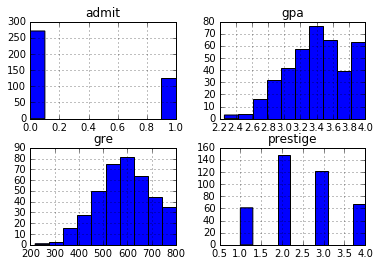

In [10]:
df.hist()

For a closer look at the data, we use stacked histograms to investigate how the relative ratio of "admit" to "not admit" will change along with the change of each independent variable.

From the stacked histogram of applicants' gre score, we confirm that the chance of admission significantly increase as an applicant's GRE score increases. It's the same case as we go through the GPA and prestige rank of an applicant, which means "better record" does imply better chance of admission!

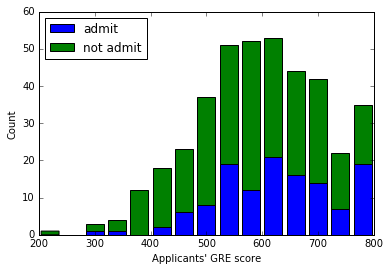

In [46]:
con = (df.admit == 1)
bins = np.linspace(200,800,16)
L1 = df[con].gre
L2 = df[~con].gre
plt.hist([L1,L2],bins,label=("admit","not admit"),stacked=True)
plt.legend(loc='upper left')
plt.xlabel('Applicants\' GRE score')
plt.ylabel('Count')
plt.show()

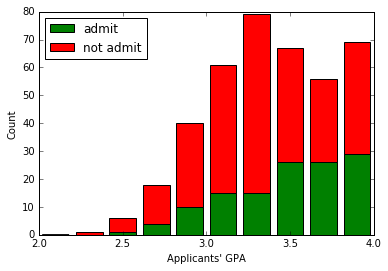

In [47]:
con = (df.admit == 1)
bins = np.linspace(2,4,11)
L1 = df[con].gpa
L2 = df[~con].gpa
plt.hist([L1,L2],bins,label=("admit","not admit"),color=("g","r"),stacked=True)
plt.legend(loc='upper left')
plt.xlabel('Applicants\' GPA')
plt.ylabel('Count')
plt.show()

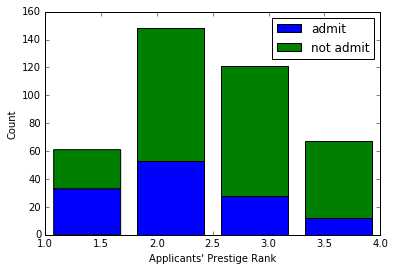

In [48]:
con = (df.admit == 1)
L1 = df[con].prestige
L2 = df[~con].prestige
plt.hist([L1,L2],bins=4,label=("admit","not admit"),stacked=True)
plt.legend(loc='upper right')
plt.xlabel('Applicants\' Prestige Rank')
plt.ylabel('Count')
plt.show()

### 2.we are going to explore the data by each prestige catagory.

In prestige catagory 1, the average GRE score is 636, average GPA is 3.54, admission rate is 33/(33 + 28)=54.1%

In [14]:
con = (df.admit == 1) & (df.prestige == 1)
sub1 = df[con]
sub1.describe()

,admit,gre,gpa,prestige
count,33.0,33.000000,33.000000,33.0
mean,1.0,636.363636,3.544242,1.0
std,0.0,110.618098,0.385511,0.0
min,1.0,460.000000,2.420000,1.0
25%,1.0,540.000000,3.370000,1.0
50%,1.0,620.000000,3.610000,1.0
75%,1.0,720.000000,3.810000,1.0
max,1.0,800.000000,4.000000,1.0


In [15]:
df[df.prestige == 1].admit.value_counts()

1    33
0    28
Name: admit, dtype: int64

In prestige catagory 2, the average GRE score is 612, average GPA is 3.44, admission rate is 53/(97 + 53)=35.3%
As we can see, applicants in prestige rank 2 has a siginificant lower rate of admission than students in prestige rank 1.

In [8]:
con = (df.admit == 1) & (df.prestige == 2)
sub1 = df[con]
sub1.describe()

,admit,gre,gpa,prestige
count,53.0,53.000000,53.000000,53.0
mean,1.0,612.075472,3.441698,2.0
std,0.0,113.635018,0.365054,0.0
min,1.0,300.000000,2.620000,2.0
25%,1.0,540.000000,3.170000,2.0
50%,1.0,620.000000,3.450000,2.0
75%,1.0,680.000000,3.750000,2.0
max,1.0,800.000000,4.000000,2.0


In [16]:
df[df.prestige == 2].admit.value_counts()

0    97
1    53
Name: admit, dtype: int64

In prestige catagory 3, the average GRE score is 616, average GPA is 3.53, admission rate is 28/(93 + 28)=23.1%

In [9]:
con = (df.admit == 1) & (df.prestige == 3)
sub1 = df[con]
sub1.describe()

,admit,gre,gpa,prestige
count,28.0,28.000000,28.000000,28.0
mean,1.0,616.428571,3.534643,3.0
std,0.0,99.785484,0.399244,0.0
min,1.0,460.000000,2.650000,3.0
25%,1.0,535.000000,3.342500,3.0
50%,1.0,620.000000,3.620000,3.0
75%,1.0,680.000000,3.862500,3.0
max,1.0,800.000000,4.000000,3.0


In [18]:
df[df.prestige == 3].admit.value_counts()

0    93
1    28
Name: admit, dtype: int64

In prestige catagory 4, the average GRE is 603, the average GPA is 3.44, the admission ratio is 12/(55+12)=17.9%. 
Here we see that in prestige rank 4, the applicant's admission ratio drops to 17.9%, which is far below the ratio in prestige rank 1.

In [10]:
con = (df.admit == 1) & (df.prestige == 4)
sub1 = df[con]
sub1.describe()

,admit,gre,gpa,prestige
count,12.0,12.000000,12.000000,12.0
mean,1.0,603.333333,3.441667,4.0
std,0.0,114.680056,0.297286,0.0
min,1.0,400.000000,2.860000,4.0
25%,1.0,520.000000,3.220000,4.0
50%,1.0,610.000000,3.535000,4.0
75%,1.0,685.000000,3.662500,4.0
max,1.0,780.000000,3.740000,4.0


In [19]:
df[df.prestige == 4].admit.value_counts()

0    55
1    12
Name: admit, dtype: int64